## Time Series Analysis for retail forcasting using Python 

#### PROBLEM STATEMENT :

In order to -- Using Machine Learning we Forecast Required Truckloads for upcoming 3 weeks. 


#### SOLUTION:

1. Data Pre-processing
2. EDA 
3. Time Series Model
    a. ARIMA
    b. SARIMA
    c. Auto SARIMA
4. Model Deployment

## 1. Data Pre-processing

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load excel into pandas dataframe
dataframe = pd.read_excel(r'C:\Users\Pratik\Downloads\Sample - Superstore.xls')

In [3]:
dataframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2021-138688,2021-06-12,2021-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2020-108966,2020-10-11,2020-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2020-108966,2020-10-11,2020-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
dataframe.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [14]:
#dataframe['Order Date']=pd.to_datetime(dataframe['Order Date'])

In [13]:
# min max date
print(dataframe['Order Date'].min())
print(dataframe['Order Date'].max())

2019-01-03 00:00:00
2022-12-30 00:00:00


In [7]:
dataset =  dataframe[['Order Date','Category','Sales']]

In [8]:
dataset = dataset.groupby(['Category','Order Date'], as_index=False).agg({"Sales": "sum"})

In [9]:
dataset

,Category,Order Date,Sales
0,Furniture,2019-01-06,2573.820
1,Furniture,2019-01-07,76.728
2,Furniture,2019-01-10,51.940
3,Furniture,2019-01-11,9.940
4,Furniture,2019-01-13,879.939
...,...,...,...
2855,Technology,2022-12-25,401.208
2856,Technology,2022-12-27,164.388
2857,Technology,2022-12-28,14.850
2858,Technology,2022-12-29,302.376


In [10]:
dataset['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [24]:
df_pivot = dataset.pivot(index='Order Date', columns='Category', values='Sales')

<AxesSubplot:xlabel='Order Date'>

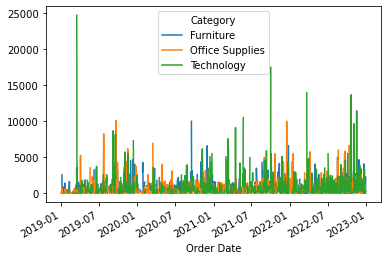

In [25]:
df_pivot.plot()

## 2. EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='Order Date'>

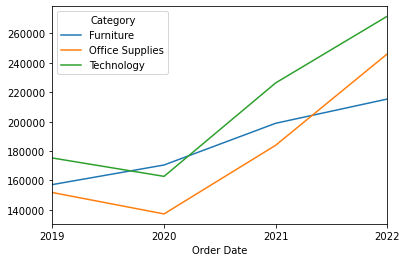

In [26]:
# Yearly Trend
df_pivot.resample('Y').sum().plot()

<AxesSubplot:xlabel='Order Date'>

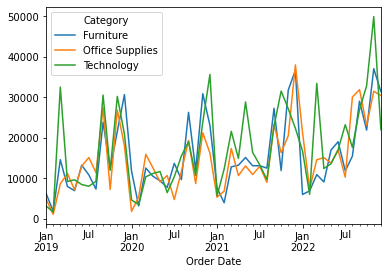

In [27]:
# Monthly Trend
df_pivot.resample('MS').sum().plot()

<AxesSubplot:xlabel='Order Date'>

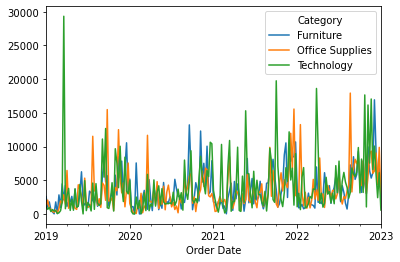

In [28]:
#Weekly
df_pivot.resample('W').sum().plot()

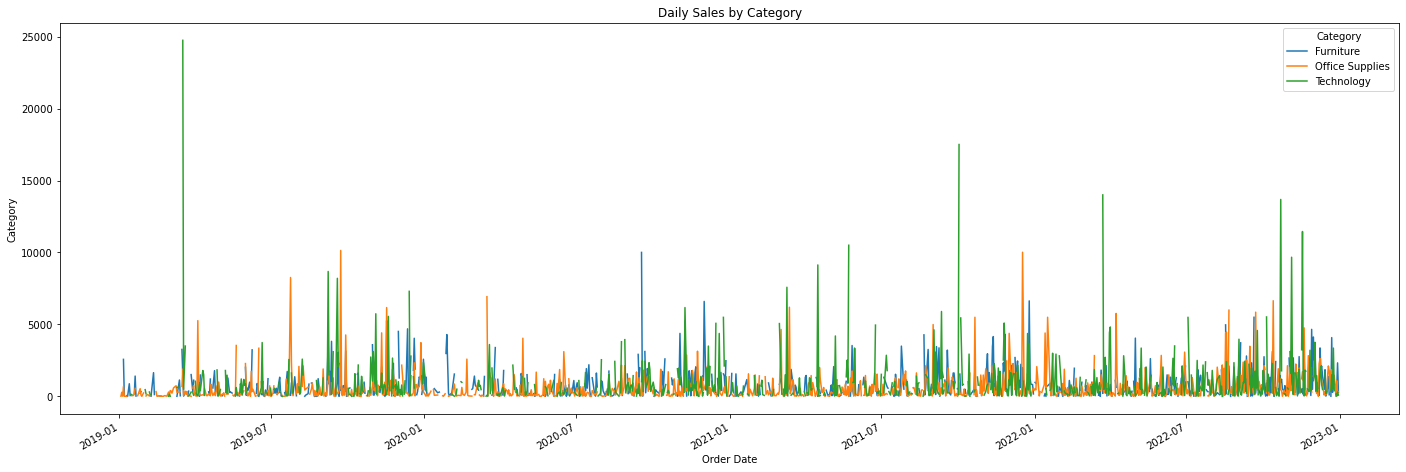

In [29]:
#daily Trend

fig, ax = plt.subplots(figsize=(24, 8))

# Plot the data as a multiple line chart
df_pivot.plot(ax=ax)

# Set the axis labels and title
ax.set_xlabel('Order Date')
ax.set_ylabel('Category')
ax.set_title('Daily Sales by Category')

# Show the plot
plt.show()

## 3. Apply Algorithm

__3.1 AR, MA and ARIMA Model__

__3.2 SARIMA Model__

__3.3 Auto SARIMA Model__

## 4. Model Selection

In [ ]:
C:\Users\somvam1\Documents\P Time Series